# Wine Datasets 

these datasets contain data about various attributes of wines. The datasets include 11 features that describe the physicochemical properties of the wine. These features include metrics like pH, alcohol content, and volatile acidity.
there are two different datasets one for white wine and the other for red wine. the attributes of both datasets are the same.
white wine dataset contains 4898 records in total and red wine dataset contains 1599 records in total.

every record has 11 features and 1 label (quality score) described as below:

Input variables (based on physicochemical tests)

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable:

12 - quality (score between 0 and 10)


There will be approaches for two different problems: first is to predict the pH (acidity) of the wine using its other attributes. pH of the wine can have an important part in its taste, the red wine dataset will be used for the first problem. second problem is a classification approach, to find out the overall quality of wine based on its other attributes, there are 4 different quality of wine scored from 1 to 4, from the poorest quality to the best quality. the overall quality of wine is very important for its price and value.

datasets can be found at : https://archive.ics.uci.edu/ml/datasets/wine+quality

## Red wine dataset - predicting pH

there will be two models implemnted on the data of red wine dataset:

1 - using multiple linear regression model to predict the pH of the wines based on some of it's other attributes 

2 - using polynomial regression model to predict the pH of the wines based on some of it's other attributes

Evaluation will be implemented on both polynomial regression and linear regression using Mean Square Error (MSE), Mean Absolute Error (MAE) and R-squared (r2)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

the structure of the dataset is not very suitable for our model to work on so first we have to organise the datasets while loading them.

In [2]:
DataRedWine = pd.read_csv('./data/winequality-red.csv', delimiter=";")
DataRedWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


here i plot the distributions to decide whether data needs to normalised or not.

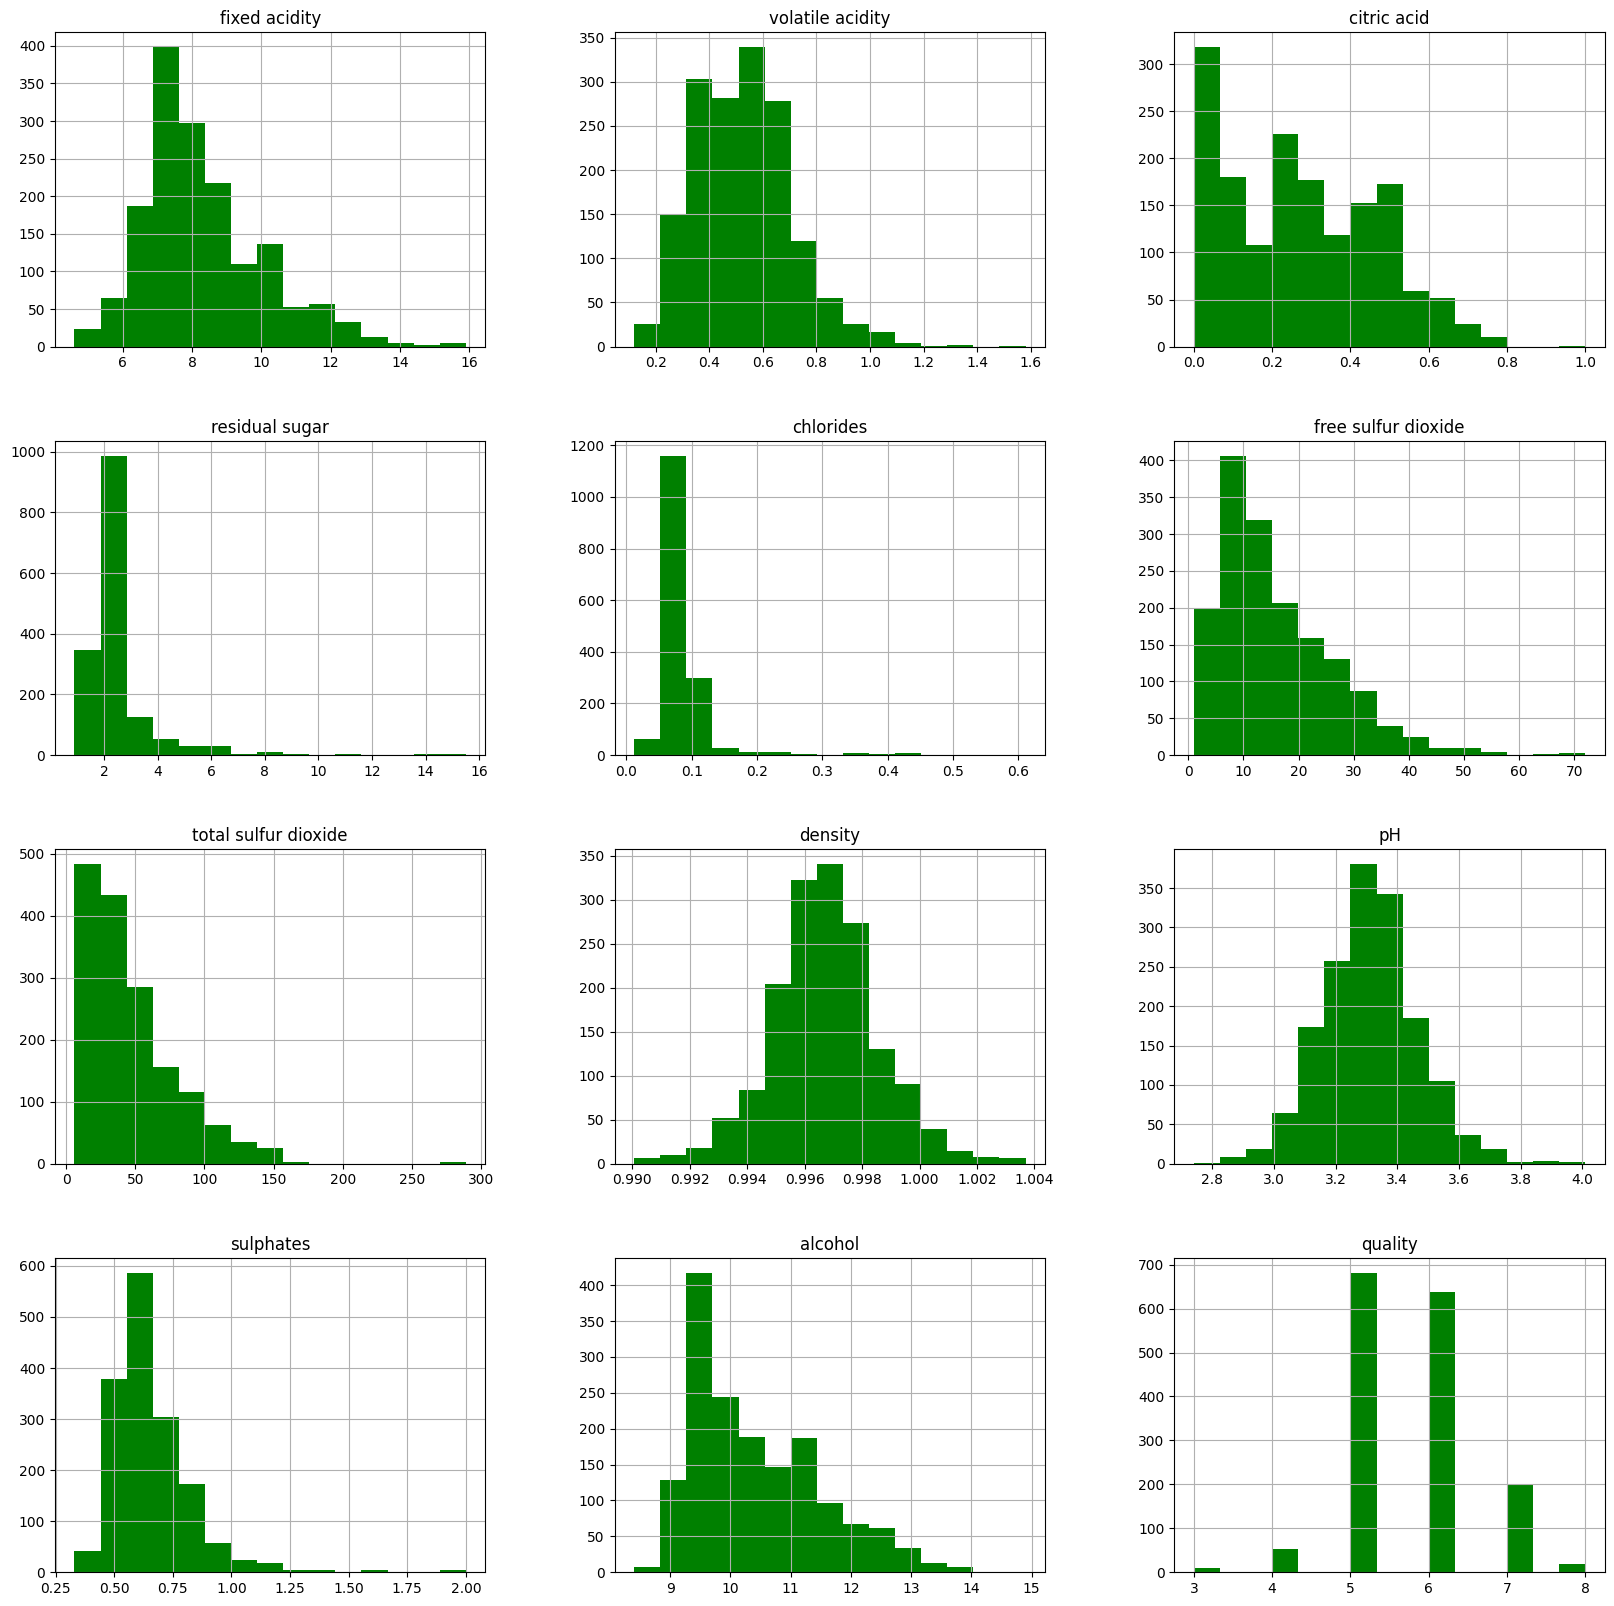

In [68]:
DataRedWine.hist(bins=15 ,figsize=(20,20), color = 'Green')
plt.show()

## Data Cleaning & processing

next step is to clean the data we have to look for any missing values or abnormal values and remove the missing values or replace them with the mean of the column they are in.

In [69]:
df = DataRedWine.dropna(inplace = False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


seems like we dont have any missing values then for the next step we can look for any outliers in the data.

In [70]:
dff = pd.DataFrame(columns=df.columns)
for col in df.columns:
    if (col != 'purpose'):
        q1 = df[col].quantile(0.25) 
        q3 = df[col].quantile(0.75) 
        iqr = q3 - q1 
        upperBound = q3 + 1.5 * iqr
        lowerBound = q1 - 1.5 * iqr 
        dff = df[(df[col] >= lowerBound) & (df[col] <= upperBound)]
df = dff.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


now i look for the correlation between different values and pH to find the best value or column to train my model on. i can do that by plotting a heat map.

<Axes: >

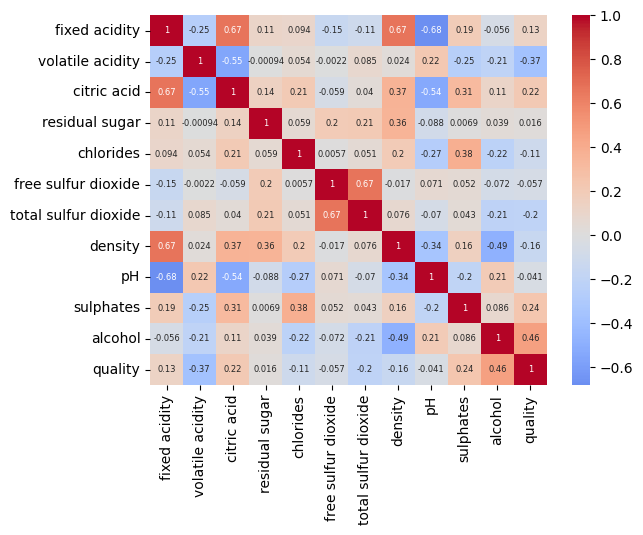

In [71]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, center=0,  annot_kws={"size": 6})

form the heatmap it can be said that fixed acidity have the highest correlation with the pH. i try to choose the features with high correlation to train the model with, and now we have a look back on the distribution of the different variables in the data and see if they need be normalised and from there it seems they need too be normalised. based on the histograms each representing a different variable it can be said their distribution is non-normal. lastly i will try to train and test the different attributes to find the best values to train the model based on the lowest MSE, MAE and the highest r2 value using the validation set.

## Multiple Linear regression

In [72]:
X = df[['fixed acidity','volatile acidity','citric acid','chlorides']]
y = df['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

In [73]:
scaler = StandardScaler()
lr = LinearRegression()
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_val)
lr.fit(X_norm, y_val)
y_pred = lr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'MSE = {mse}, MAE = {mae}, r2 ={r2}')

MSE = 0.7325321087696566, MAE = 0.8448430575870824, r2 =-27.08505255253373


the values of MSE, MAE and r2 are not very promising when trying the model on the validation set.

In [74]:
X_norm = scaler.fit_transform(X_test)
lr.fit(X_norm, y_test)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE = {mse}, MAE = {mae}, r2 ={r2}')

MSE = 0.6789816842286865, MAE = 0.8134973563268005, r2 =-27.645823506542953


MSE and MAE indicate that the model's predictions are off on average and r2 suggests that the model is performing very poorly and its predictions are not significantly better than just guessing the mean value of the target variable. Therefore, the overall performance of the model is not acceptable.

## polynomial regression

now i want to perform a polynomial regression model on the data set to compare the performance of the multiple linear regression model with it. i will use all of the attributes regardless of their correlation with pH since this model is more complicated compared to the multiple linear regression and will be handling it better, also it will have a better performance by doing so.

In [75]:
X = df.drop(columns=['pH'])
y = df['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

In [76]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)
lr = LinearRegression()
lr.fit(X_poly_train, y_train)
y_pred = lr.predict(X_poly_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'Polynomial regression: MSE = {mse}, MAE = {mae}, r2 = {r2}')

Polynomial regression: MSE = 0.007477809896356751, MAE = 0.06494266831297395, r2 = 0.7133031011162476


from the MSE, MEA and r2 values it is obvious that the performance of the polynomial regression model is much better than the linear regression and it is performing well on the dataset when testing the validation set.

In [77]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_poly_train, y_train)
y_pred = lr.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Polynomial regression: MSE = {mse}, MAE = {mae}, r2 = {r2}')

Polynomial regression: MSE = 0.006677207441267851, MAE = 0.06148914726936211, r2 = 0.7182926869427726


the values of MSE, MEA and r2 it can be said that the model is performing well on unseen data too and is not overfitting. hence it can be said that using polynomial regression model is a better approach to predict the pH of wines.

## White wine dataset - finding the class (quality)

there will be two models implemnted on the data of white wine dataset:

1 - classification approach to find out the quality (class) of wine using KNN model

2 - classification approach to find out the quality (class) of wine using an artificial neural network model

At the end evaluation will be implemented on both KNN model and artificial neural network model using accuracy and F-score

In [78]:
DataWhiteWine = pd.read_csv('./data/winequality-white.csv', delimiter=";")
DataWhiteWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


here i plot the distributions to decide whether data needs to normalised.

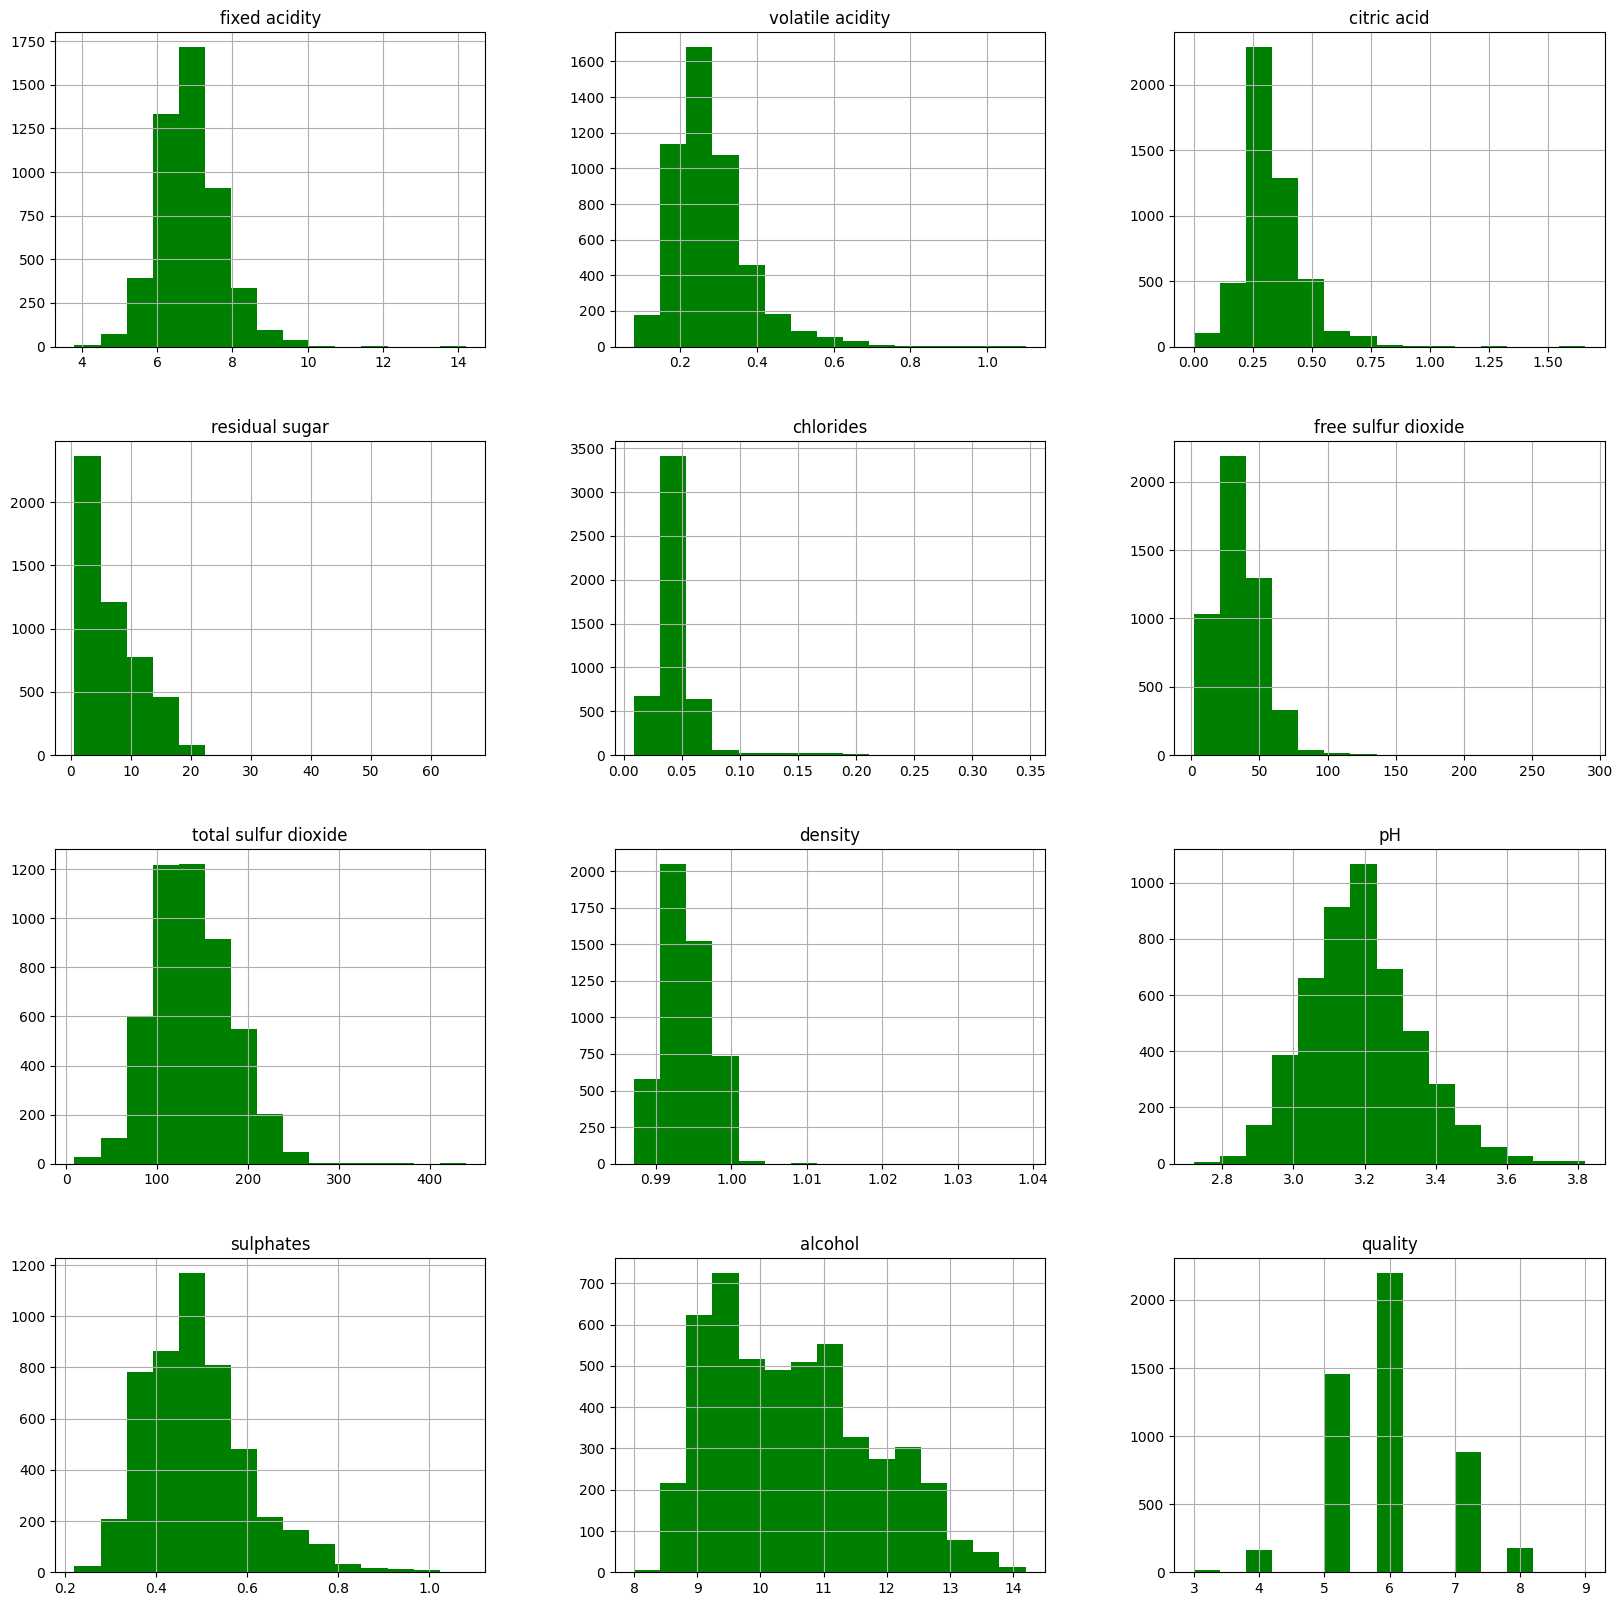

In [79]:
DataWhiteWine.hist(bins=15 ,figsize=(20,20), color = 'Green')
plt.show()

## Data Cleaning & processing

In [80]:
df = DataWhiteWine.dropna(inplace = False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


seems like we dont have any missing values then for the next step we can look for any outliers in the data.

In [81]:
dff = pd.DataFrame(columns=df.columns)
for col in df.columns:
    if (col != 'purpose'):
        q1 = df[col].quantile(0.25) 
        q3 = df[col].quantile(0.75) 
        iqr = q3 - q1 
        upperBound = q3 + 1.5 * iqr
        lowerBound = q1 - 1.5 * iqr 
        dff = df[(df[col] >= lowerBound) & (df[col] <= upperBound)]
df = dff.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [82]:
print(df['quality'].value_counts())

6    2198
5    1457
7     880
4     163
Name: quality, dtype: int64


i will just replace the values of the qualities with their respective ranking from 1 to 4. so a wine with quality of 4 will be converted to 1 which is the lowest quality and a wine with quality of 7 will be converted to 4 which is the highest quality of wine in this dataset.

In [83]:
df['quality'] = df['quality'].replace({6: 3, 5: 2, 7: 4, 4: 1})

In [84]:
print(df['quality'].value_counts())

3    2198
2    1457
4     880
1     163
Name: quality, dtype: int64


we have 4 different classes for wines.

now i look for the correlation between different values and wine quality to find the best value or column to train my model on. i can do that by plotting a heat map.

<Axes: >

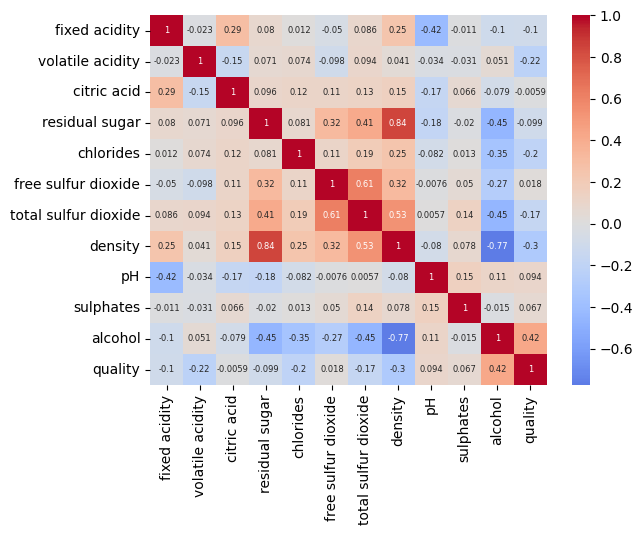

In [85]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, center=0,  annot_kws={"size": 6})

from the heatmap it can be said that there is no feature with mentionable correlation with the quality of wine. the highest correlation is 0.42 that is between alcohol percentage and quality. i will be trying to find the best values to use for training my classification model and i also will normalise the data before i use them for training.

## KNN

first i need to tune the hyperparameters of the KNN model which can be achieved by either implementing a cross validation or GridSearchCV which is an automated tuning method.

In [86]:
X = df.drop(['quality'], axis=1)
y = df['quality']
scaler = StandardScaler()
X = scaler.fit_transform(X)
param_grid = {'n_neighbors': range(1, 135, 5)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'n_neighbors': 41}


the tuning method says the best value of K would be 41 so i use the value 41 for my n_neighbors.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracyy = accuracy_score(y_val, y_pred)
f_score = f1_score(y_val, y_pred, average='weighted')
print(f"Accuracy: {accuracyy:.4f}")
print(f"F-score: {f_score:.4f}")

Accuracy: 0.5885
F-score: 0.5702


so far the F-score and accuracy score on validation dataset is not very promising the accuracy is test dataset should determine if the model is performing well or not.

In [88]:

knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracyy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracyy:.4f}")
print(f"F-score: {f_score:.4f}")

Accuracy: 0.5681
F-score: 0.5474


Accuracy and F-score suggest that the model's performance is only slightly better than randomly guessing the class. Typically, a good model should have an accuracy and F-score significantly higher than 0.5. Therefore, it may be necessary try a different algorithm to get better performance.

## Neural network

I will be using Multi-Layer Perceptron (MLP) as my neural network model because i've work with it before and it is easier for me to train it. there are some methods to tune the hyperparameters of a neural network model but it is really time consuming and also memory consuming in terms of time complexity, so i try to find the best hyperparameters one by one in trial and error.

In [89]:
mlp = MLPClassifier(solver= 'lbfgs',activation = 'tanh',hidden_layer_sizes=(90,90), max_iter=250, alpha = 0.01)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f_score = f1_score(y_val, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F-score: {f_score:.4f}")

Accuracy: 0.6579
F-score: 0.6575


neural network model has a better performance in terms of accuracy and F-score than the KNN model on the validation set, although it is still not very perfect but it is significantly better than just guessing the quality of the wine.

In [94]:
mlp = MLPClassifier(solver= 'lbfgs',activation = 'tanh',hidden_layer_sizes=(90,90), max_iter=250, alpha = 0.01)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F-score: {f_score:.4f}")


Accuracy: 0.6734
F-score: 0.6707


the accuracy of the neural network model is significantly better than the KNN but still not very ideal despite that it is significantly better than guessing the values of qualities. However it is not only the model that is important in terms of getting high accuracy but the correlation of the different features with the quality of the wine is very relevant to accuracy we get from our model and when i plot the correlations it is not very promising.

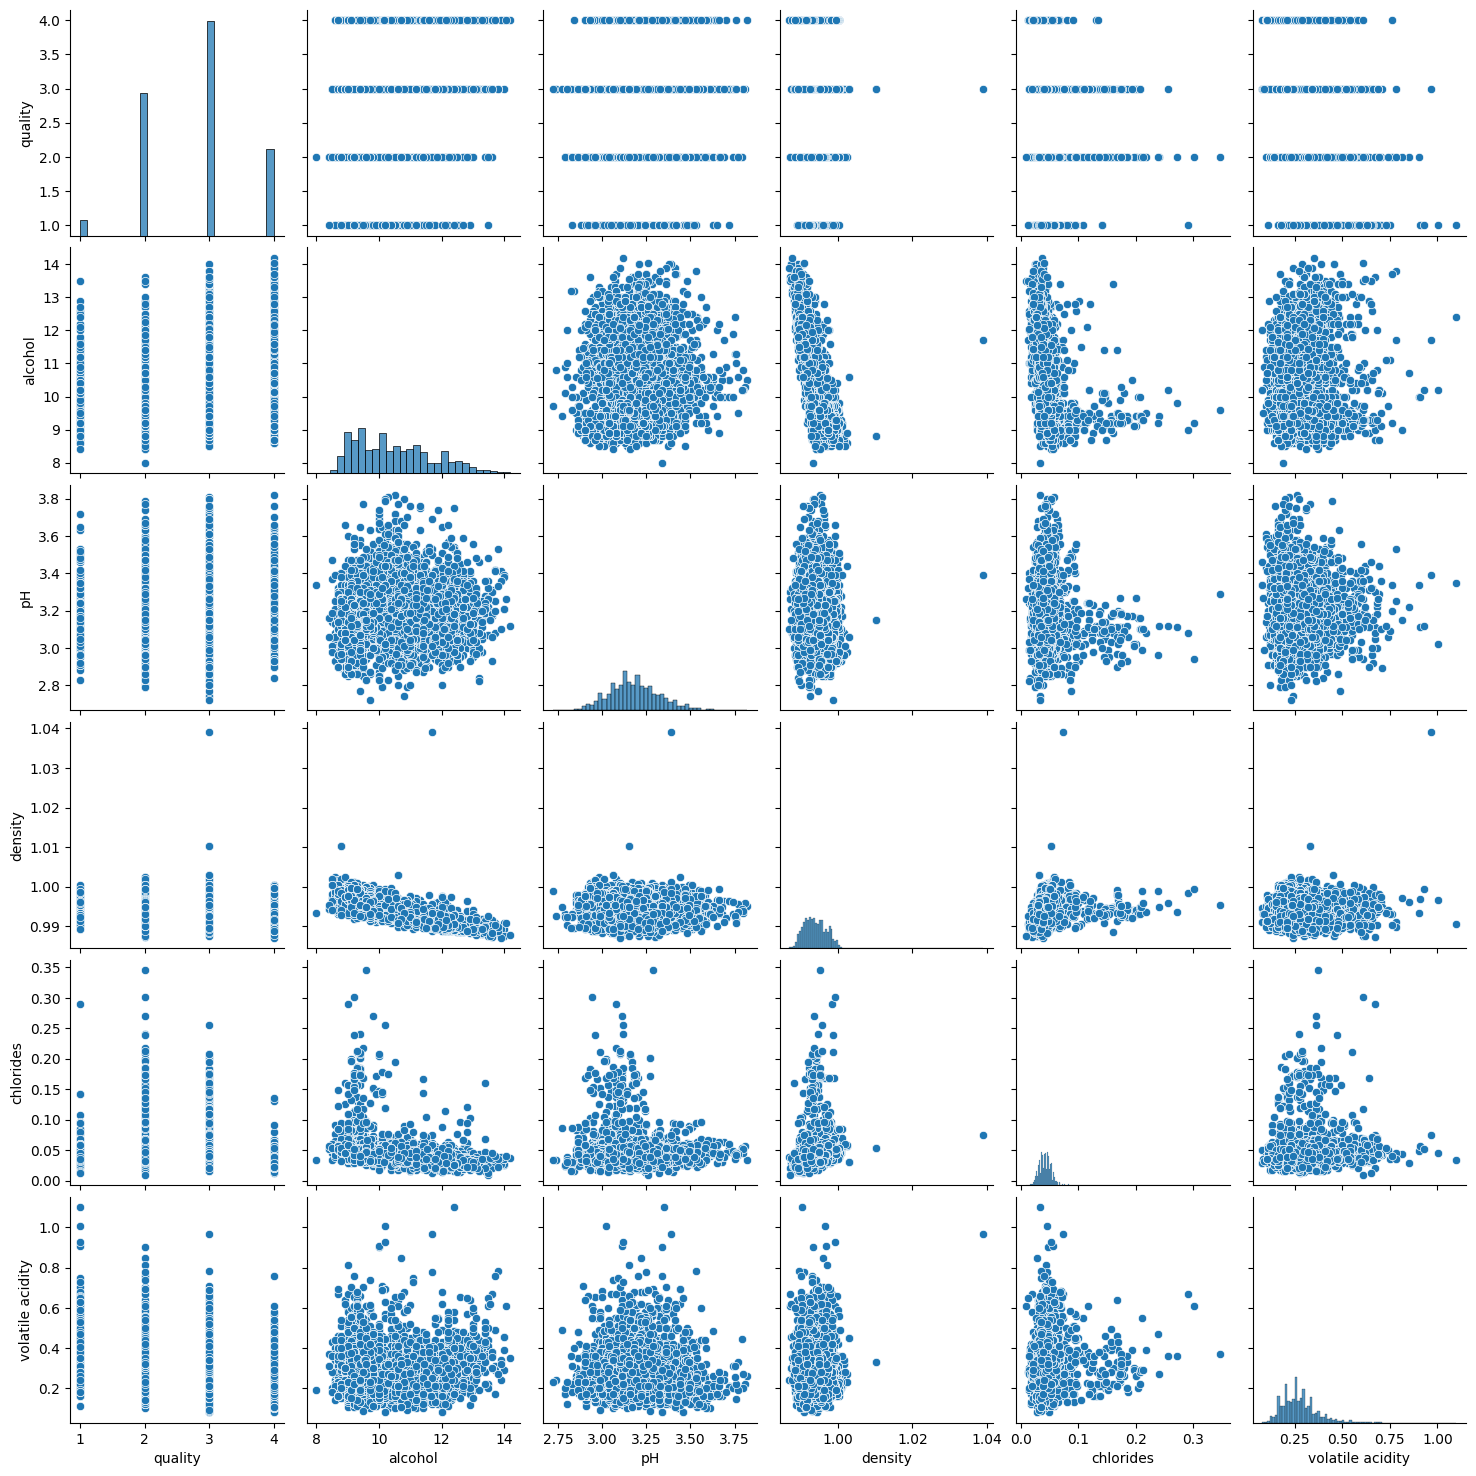

In [91]:
sns.pairplot(df[['quality','alcohol','pH','density','chlorides','volatile acidity']])

<Axes: xlabel='models'>

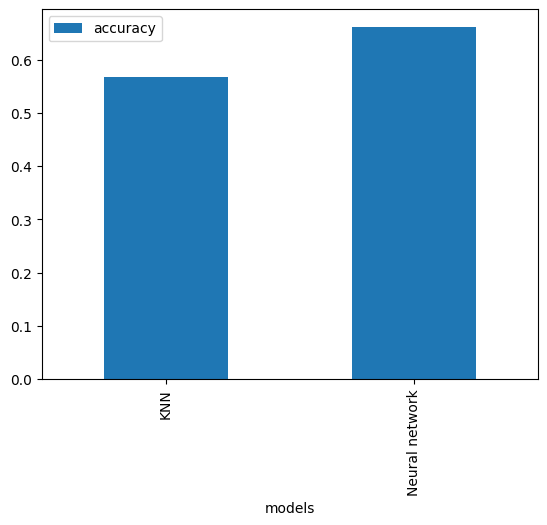

In [92]:
dataframe = {'models':['KNN','Neural network'], 'accuracy':[accuracyy,accuracy]}
pl = pd.DataFrame(dataframe)
pl.plot(kind='bar', x = 'models', y='accuracy')

in this comparison we can see that despite Neural network model not having a very high accuracy score it is still much better than the accuracy of KNN and is significantly better than randomly guessing the class of wines and by having a look at the correlation between the wine quality and it's other variables it is very nice to get a accuracy score above 66%. overall the neural network is showing better performance.